In [1]:
import pandas as pd
from scipy.signal import resample
import matplotlib.pyplot as plt
from scipy.signal import decimate
import numpy as np
from scipy import interpolate
from scipy.signal import iirnotch
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import lfilter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from ts2vg import NaturalVG
import networkx as nx
from pyunicorn.timeseries import VisibilityGraph



file_path = "/Users/PC/Desktop/M2_CNN/Internship/motion-artifact-contaminated-fnirs-and-eeg-data-1.0.0/EEG-csv/Trial7.csv"
eeg = pd.read_csv(file_path, header=None)

/Users/PC/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def construct_visibility_graph(time_series):
    vg = VisibilityGraph(time_series)
    return vg

def extract_graph_features(vg):
    degree_sequence = np.array([degree for node, degree in vg.degree()])
    clustering_coeffs = np.array(list(nx.clustering(vg).values()))
    return degree_sequence, clustering_coeffs

def plot_data(data1, data2, data3, data4, data5, title):
        plt.figure(figsize=(12, 6))
        plt.plot(data1, label='Channel 1')
        plt.plot(data2, label='Channel 2')
        plt.plot(data3, label='Acc 1 X')
        plt.plot(data4, label='Acc 1 Y')
        plt.plot(data5, label='Acc 1 Z')
        plt.title(title)
        plt.legend()
        plt.show()

def plott_data(data1, data2, title):
        plt.figure(figsize=(12, 6))
        plt.plot(data1, label='Channel 1')
        plt.plot(data2, label='Channel 2')
        plt.title(title)
        plt.legend()
        plt.show()

def plottt_data(data1, data2, data3, title):
        plt.figure(figsize=(12, 6))
        plt.plot(data1, label='Acc 1 X')
        plt.plot(data2, label='Acc 1 Y')
        plt.plot(data3, label="Acc 1 Z")
        plt.title(title)
        plt.legend()
        plt.show()


Original shapes:
Channel 1: (1130496,)
Channel 2: (1130496,)
Acc 1 X: (1130496,)
Acc 1 Y: (1130496,)
Acc 1 Z: (1130496,)
Acc 2 X: (1130496,)
Acc 2 Y: (1130496,)
Acc 2 Z: (1130496,)
Trigger EEG: (1130496,)
Trigger Acc: (1130496,)


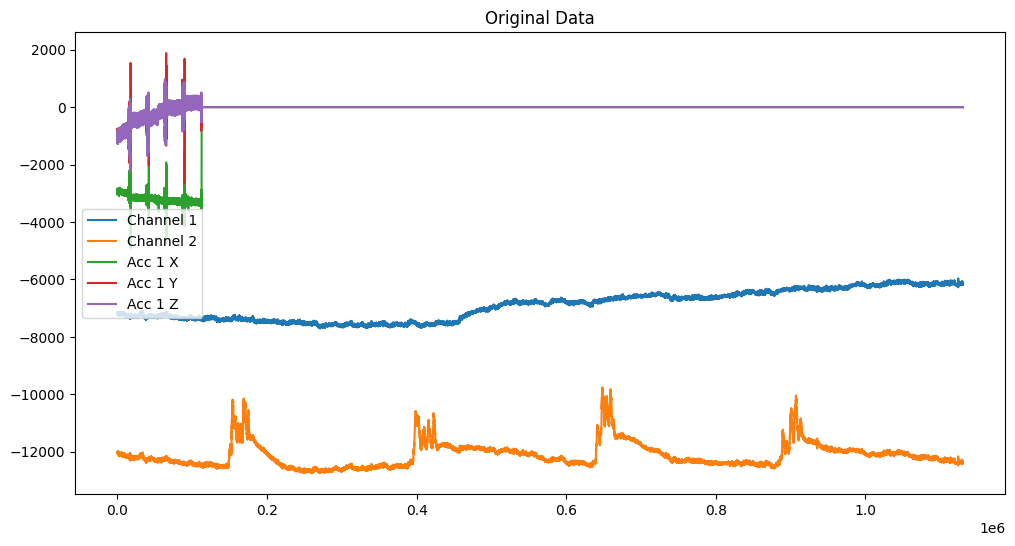

In [3]:
channel1 = eeg.iloc[:, 1]
channel2 = eeg.iloc[:, 2]
acc_1_x = eeg.iloc[:, 4] * 50000
acc_1_y = eeg.iloc[:, 5] * 50000
acc_1_z = eeg.iloc[:, 6] * 50000
acc_2_x = eeg.iloc[:, 7] * 50000
acc_2_y = eeg.iloc[:, 8] * 50000
acc_2_z = eeg.iloc[:, 9] * 50000
trigger_eeg = eeg.iloc[:,3]
trigger_acc = eeg.iloc[:,10] 

print("Original shapes:")
print("Channel 1:", channel1.shape)
print("Channel 2:", channel2.shape)
print("Acc 1 X:", acc_1_x.shape)
print("Acc 1 Y:", acc_1_y.shape)
print("Acc 1 Z:", acc_1_z.shape)
print("Acc 2 X:", acc_2_x.shape)
print("Acc 2 Y:", acc_2_y.shape)
print("Acc 2 Z:", acc_2_z.shape)
print("Trigger EEG:", trigger_eeg.shape)
print("Trigger Acc:", trigger_acc.shape)

# Original data
plot_data(channel1, channel2, acc_1_x, acc_1_y, acc_1_z, title='Original Data')

After cutting according to triggers:
Channel 1: (1106064,)
Channel 2: (1106064,)
Acc 1 X: (108018,)
Acc 1 Y: (108018,)
Acc 1 Z: (108018,)
Acc 2 X: (108018,)
Acc 2 Y: (108018,)
Acc 2 Z: (108018,)


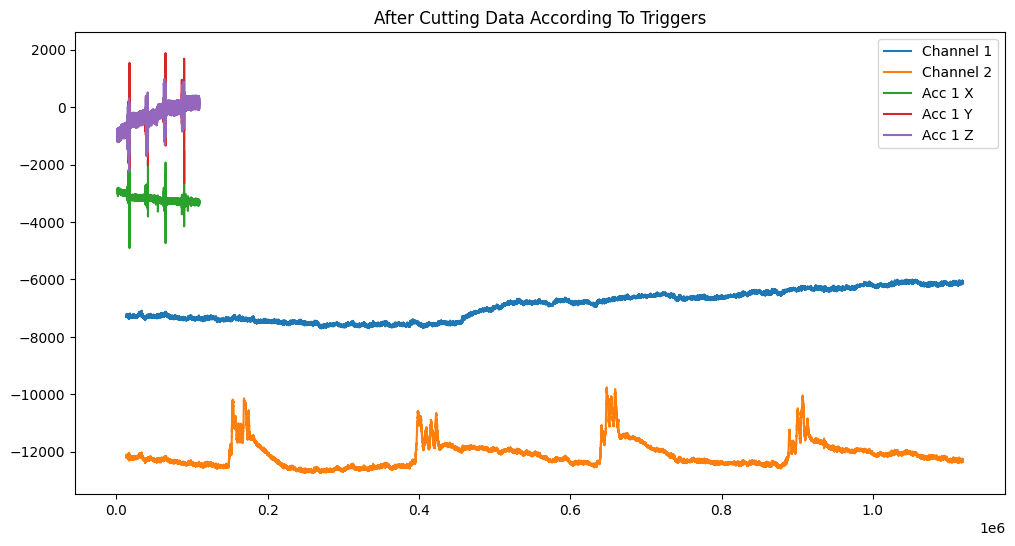

In [4]:
first_one_index = trigger_eeg.where(trigger_eeg == 1).dropna().index.tolist()[0] if len(trigger_eeg.where(trigger_eeg == 1).dropna()) > 0 else None

    
last_one_index = trigger_eeg.where(trigger_eeg == 1).dropna().index.tolist()[-1] if len(trigger_eeg.where(trigger_eeg == 1).dropna()) > 0 else None

channel1_cut = channel1.iloc[first_one_index:last_one_index+1]
channel2_cut = channel2.iloc[first_one_index:last_one_index+1]


threshold_indices = trigger_acc.where(trigger_acc > 0.20).dropna().index.tolist()

    
first_threshold_index = threshold_indices[0]

    
last_threshold_index = threshold_indices[-1]

acc_1_x_cut = acc_1_x.iloc[first_threshold_index:last_threshold_index+1]
acc_1_y_cut = acc_1_y.iloc[first_threshold_index:last_threshold_index+1]
acc_1_z_cut = acc_1_z.iloc[first_threshold_index:last_threshold_index+1]
acc_2_x_cut = acc_2_x.iloc[first_threshold_index:last_threshold_index+1]
acc_2_y_cut = acc_2_y.iloc[first_threshold_index:last_threshold_index+1]
acc_2_z_cut = acc_2_z.iloc[first_threshold_index:last_threshold_index+1]


print("After cutting according to triggers:")
print("Channel 1:", channel1_cut.shape)
print("Channel 2:", channel2_cut.shape)
print("Acc 1 X:", acc_1_x_cut.shape)
print("Acc 1 Y:", acc_1_y_cut.shape)
print("Acc 1 Z:", acc_1_z_cut.shape)
print("Acc 2 X:", acc_2_x_cut.shape)
print("Acc 2 Y:", acc_2_y_cut.shape)
print("Acc 2 Z:", acc_2_z_cut.shape)

# Plot after removing zero part of accelerometers
plot_data(channel1_cut, channel2_cut, acc_1_x_cut, acc_1_y_cut, acc_1_z_cut, title='After Cutting Data According To Triggers')


After downsampling of EEG Channels:
Channel 1 downsampled: (141312,)
Channel 2 downsampled: (141312,)

After downsampling and adjusting to multiply of 1024:
Channel 1 downsampled: (141120,)
Channel 2 downsampled: (141120,)

After cutting for division of 1024:
Acc 1 X interpolated: (141120,)
Acc 1 Y interpolated: (141120,)
Acc 1 Z interpolated: (141120,)
Acc 2 X interpolated: (141120,)
Acc 2 Y interpolated: (141120,)
Acc 2 Z interpolated: (141120,)


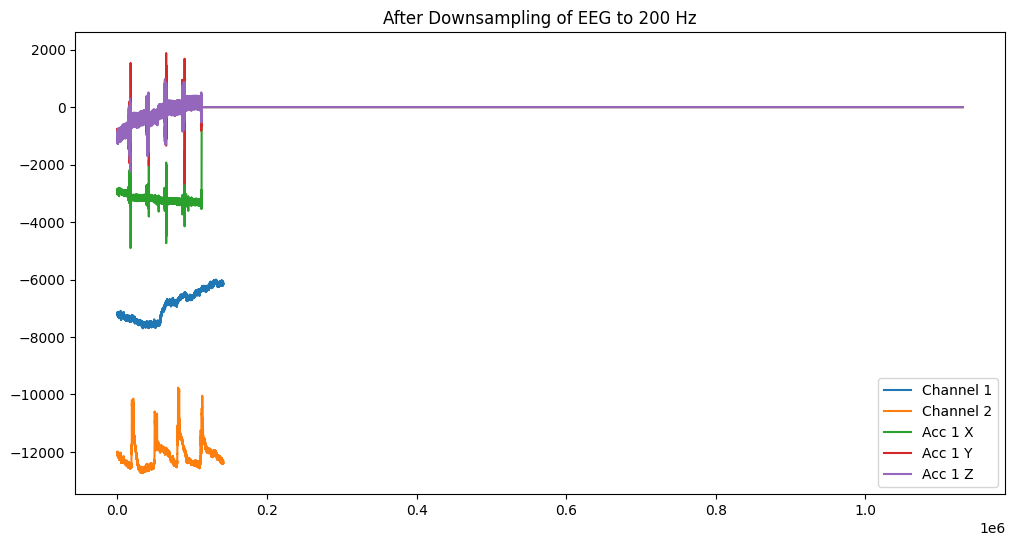

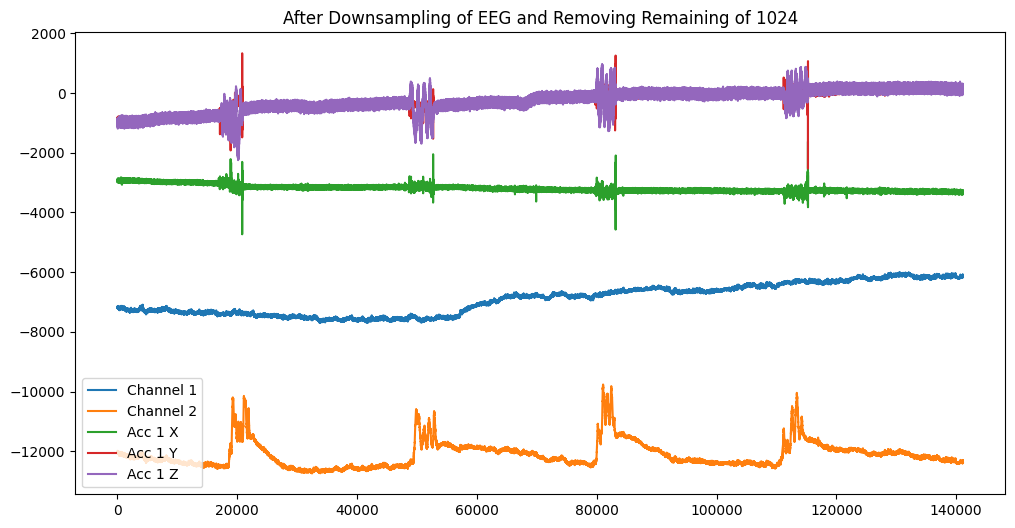

In [5]:
# Downsampling
factor_eeg = int(2048 / 256)

channel1_downs = channel1[::factor_eeg].reset_index(drop=True)
channel2_downs = channel2[::factor_eeg].reset_index(drop=True)

print("\nAfter downsampling of EEG Channels:")
print("Channel 1 downsampled:", channel1_downs.shape)
print("Channel 2 downsampled:", channel2_downs.shape)



remaining = len(channel1_downs) % 1024
    
new_len = len(channel1_downs) - remaining
channel1_downsampled = channel1_downs[:new_len]
channel2_downsampled = channel2_downs[:new_len]

    

print("\nAfter downsampling and adjusting to multiply of 1024:")
print("Channel 1 downsampled:", channel1_downsampled.shape)
print("Channel 2 downsampled:", channel2_downsampled.shape)


# Interpolation
original_sampling_rate = 200  
new_sampling_rate = 256  
original_data_length = len(acc_1_x_cut)
original_duration = original_data_length / original_sampling_rate
new_data_length = len(channel1_downs)
time_original = np.linspace(0, original_duration, original_data_length)
time_new = np.linspace(0, original_duration, new_data_length)
acc_1_x_interpolated = pd.Series(interp1d(time_original, acc_1_x_cut, kind='linear')(time_new))
acc_1_y_interpolated = pd.Series(interp1d(time_original, acc_1_y_cut, kind='linear')(time_new))
acc_1_z_interpolated = pd.Series(interp1d(time_original, acc_1_z_cut, kind='linear')(time_new))
acc_2_x_interpolated = pd.Series(interp1d(time_original, acc_2_x_cut, kind='linear')(time_new))
acc_2_y_interpolated = pd.Series(interp1d(time_original, acc_2_y_cut, kind='linear')(time_new))
acc_2_z_interpolated = pd.Series(interp1d(time_original, acc_2_z_cut, kind='linear')(time_new))



new_len_acc = len(acc_1_x_interpolated) - remaining 
acc_1_x_interpolated = acc_1_x_interpolated[:new_len_acc]
acc_1_y_interpolated = acc_1_y_interpolated[:new_len_acc]
acc_1_z_interpolated = acc_1_z_interpolated[:new_len_acc]
acc_2_x_interpolated = acc_2_x_interpolated[:new_len_acc]
acc_2_y_interpolated = acc_2_y_interpolated[:new_len_acc]
acc_2_z_interpolated = acc_2_z_interpolated[:new_len_acc]
    

print("\nAfter cutting for division of 1024:")
print("Acc 1 X interpolated:", acc_1_x_interpolated.shape)
print("Acc 1 Y interpolated:", acc_1_y_interpolated.shape)  
print("Acc 1 Z interpolated:", acc_1_z_interpolated.shape)
print("Acc 2 X interpolated:", acc_2_x_interpolated.shape)
print("Acc 2 Y interpolated:", acc_2_y_interpolated.shape)
print("Acc 2 Z interpolated:", acc_2_z_interpolated.shape)



# Plot after downsampling of EEG to 200 Hz
plot_data(channel1_downs, channel2_downs, acc_1_x, acc_1_y, acc_1_z, title='After Downsampling of EEG to 200 Hz')

# Plot after downsampling of EEG and Remaining of 1024
plot_data(channel1_downsampled, channel2_downsampled, acc_1_x_interpolated, acc_1_y_interpolated, acc_1_z_interpolated, title='After Downsampling of EEG and Removing Remaining of 1024')



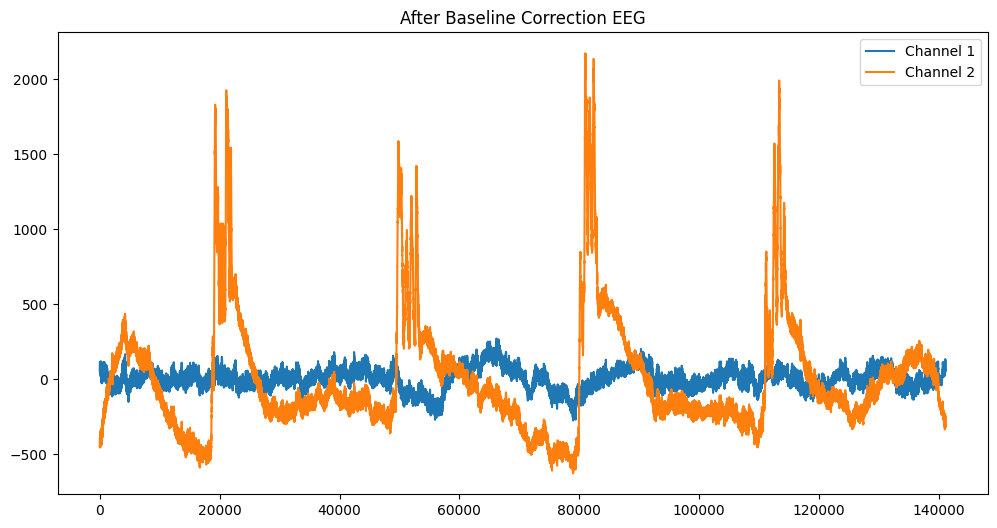

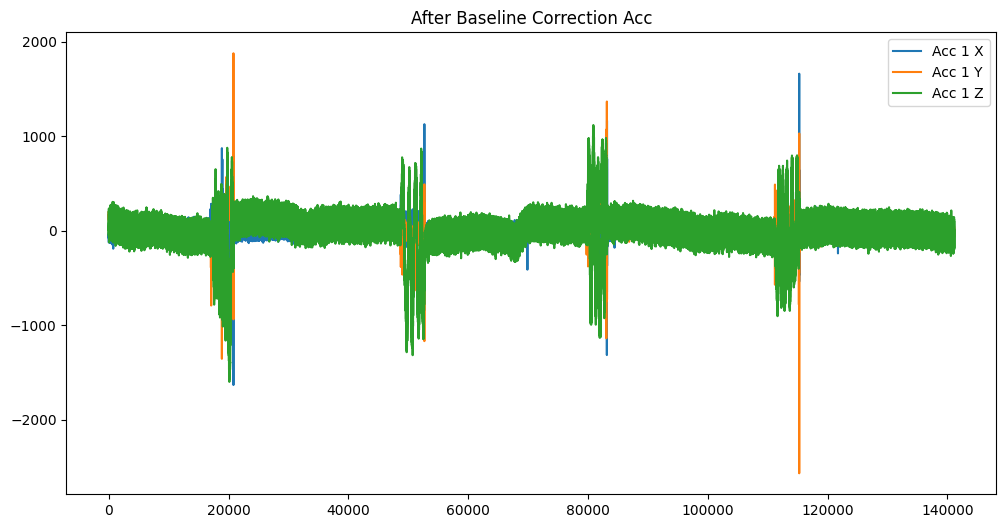

In [6]:
#Baseline Drift Correction

polynomial_order_eeg = 10
polynomial_order_acc = 5

baseline_gt = np.polyfit(np.arange(len(channel1_downsampled)), channel1_downsampled, polynomial_order_eeg)
baseline_corrected_gt = channel1_downsampled - np.polyval(baseline_gt, np.arange(len(channel1_downsampled)))
channel1_corrected = baseline_corrected_gt

baseline_mc = np.polyfit(np.arange(len(channel2_downsampled)), channel2_downsampled, polynomial_order_eeg)
baseline_corrected_mc = channel2_downsampled - np.polyval(baseline_mc, np.arange(len(channel2_downsampled)))
channel2_corrected = baseline_corrected_mc

baseline_acc1x = np.polyfit(np.arange(len(acc_1_x_interpolated)), acc_1_x_interpolated, polynomial_order_acc)
baseline_corrected_acc1x = acc_1_x_interpolated - np.polyval(baseline_acc1x, np.arange(len(acc_1_x_interpolated)))
acc_1_x_corrected = baseline_corrected_acc1x
baseline_acc1y = np.polyfit(np.arange(len(acc_1_y_interpolated)), acc_1_y_interpolated, polynomial_order_acc)
baseline_corrected_acc1y = acc_1_y_interpolated - np.polyval(baseline_acc1y, np.arange(len(acc_1_y_interpolated)))
acc_1_y_corrected = baseline_corrected_acc1y
baseline_acc1z = np.polyfit(np.arange(len(acc_1_z_interpolated)), acc_1_z_interpolated, polynomial_order_acc)
baseline_corrected_acc1z = acc_1_z_interpolated - np.polyval(baseline_acc1z, np.arange(len(acc_1_z_interpolated)))
acc_1_z_corrected = baseline_corrected_acc1z
baseline_acc2x = np.polyfit(np.arange(len(acc_2_x_interpolated)), acc_2_x_interpolated, polynomial_order_acc)
baseline_corrected_acc2x = acc_2_x_interpolated - np.polyval(baseline_acc2x, np.arange(len(acc_2_x_interpolated)))
acc_2_x_corrected = baseline_corrected_acc2x
baseline_acc2y = np.polyfit(np.arange(len(acc_2_y_interpolated)), acc_2_y_interpolated, polynomial_order_acc)
baseline_corrected_acc2y = acc_2_y_interpolated - np.polyval(baseline_acc2y, np.arange(len(acc_2_y_interpolated)))
acc_2_y_corrected = baseline_corrected_acc2y
baseline_acc2z = np.polyfit(np.arange(len(acc_2_z_interpolated)), acc_2_z_interpolated, polynomial_order_acc)
baseline_corrected_acc2z = acc_2_z_interpolated - np.polyval(baseline_acc2z, np.arange(len(acc_2_z_interpolated)))
acc_2_z_corrected = baseline_corrected_acc2z

#After baseline correction

plott_data(channel1_corrected, channel2_corrected, title='After Baseline Correction EEG')

#After baseline correction Acc

plottt_data(acc_1_x_corrected, acc_1_y_corrected,acc_1_z_corrected, title='After Baseline Correction Acc')


    

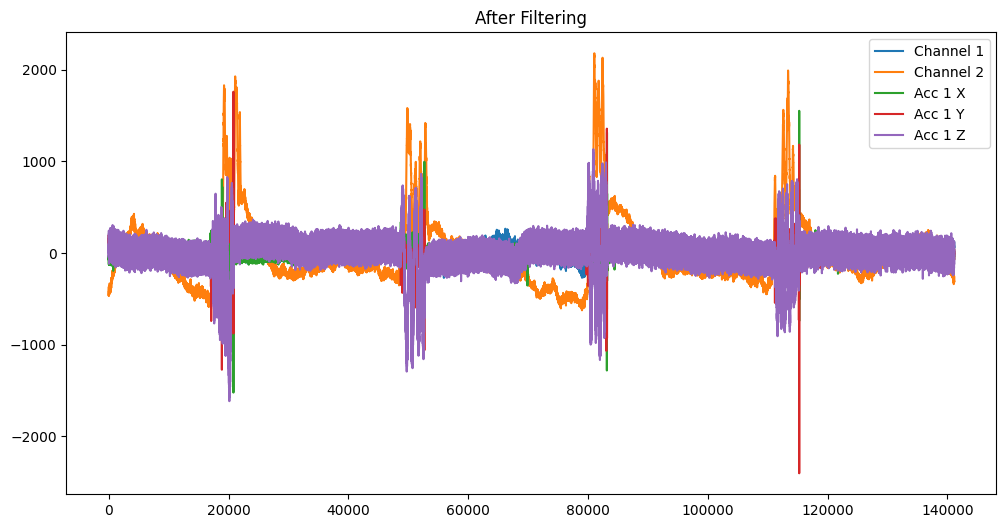

In [7]:

# Sampling rate and notch filter parameters
sampling_rate = 256  # Hz
notch_freq = 50  # Hz
Q_factor = 10
b, a = iirnotch(notch_freq, Q_factor, fs=sampling_rate)

# Apply notch filter
def apply_notch_filter(data, b, a):
    filtered_data = lfilter(b, a, data)
    return filtered_data

channel1_filtered = apply_notch_filter(channel1_corrected, b, a)
channel2_filtered = apply_notch_filter(channel2_corrected, b, a)
acc_1_x_filtered = apply_notch_filter(acc_1_x_corrected, b, a)
acc_1_y_filtered = apply_notch_filter(acc_1_y_corrected, b, a)
acc_1_z_filtered = apply_notch_filter(acc_1_z_corrected, b, a)
acc_2_x_filtered = apply_notch_filter(acc_2_x_corrected, b, a)
acc_2_y_filtered = apply_notch_filter(acc_2_y_corrected, b, a)
acc_2_z_filtered = apply_notch_filter(acc_2_z_corrected, b, a)

# Plot after filtering
plot_data(channel1_filtered, channel2_filtered, acc_1_x_filtered, acc_1_y_filtered, acc_1_z_filtered, title='After Filtering')


In [8]:
 
# Segmentation
segment_length = 1024
overlap_ratio = 0.5

def segment_data_with_overlap(data, segment_length, overlap_ratio):
    if isinstance(data, pd.Series):
        data = data.to_numpy()

    stride = int(segment_length * (1 - overlap_ratio))
    num_segments = int(np.ceil(len(data) / stride))
    segments = np.zeros((num_segments, segment_length, 1))
    for i in range(num_segments):
        start_index = i * stride
        end_index = min(start_index + segment_length, len(data))
        segments[i, :end_index - start_index, 0] = data[start_index:end_index]
    return segments

channel2_segments = segment_data_with_overlap(channel2_filtered, segment_length, overlap_ratio)
acc_1_x_segments = segment_data_with_overlap(acc_1_x_filtered, segment_length, overlap_ratio)
acc_1_y_segments = segment_data_with_overlap(acc_1_y_filtered, segment_length, overlap_ratio)
acc_1_z_segments = segment_data_with_overlap(acc_1_z_filtered, segment_length, overlap_ratio)
channel1_segments= segment_data_with_overlap(channel1_filtered, segment_length, overlap_ratio)

In [10]:
acc_1_x_segments.shape

(276, 1024, 1)

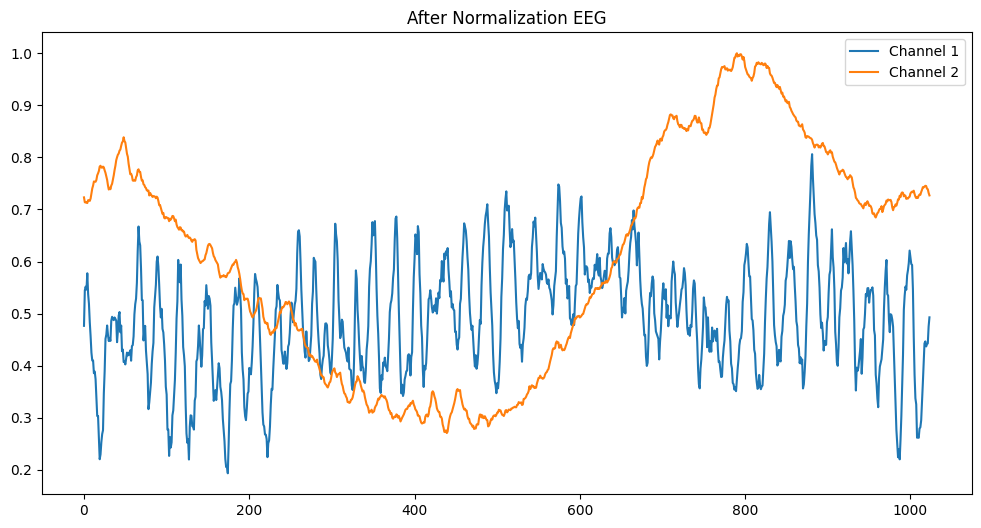

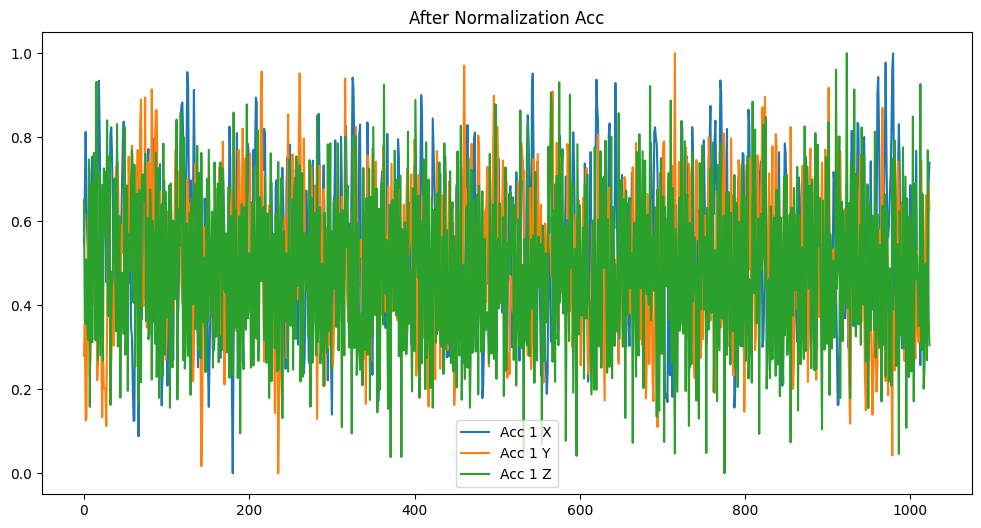

In [13]:



def normalize_acc_segments(acc_1_x_segments):
    num_segments, segment_size, _ = acc_1_x_segments.shape
    
    acc_1_x_normalized = np.empty_like(acc_1_x_segments)
    
    min_values = np.empty(num_segments)
    max_values = np.empty(num_segments)
    
    for i in range(num_segments):
        segment = acc_1_x_segments[i, :, 0]  
        
        min_value = np.min(segment)
        max_value = np.max(segment)
        
        min_values[i] = min_value
        max_values[i] = max_value
        
        # Normalize the segment
        acc_1_x_normalized[i, :, 0] = (segment - min_value) / (max_value - min_value)
    
    return acc_1_x_normalized, min_values, max_values


acc_1_x_normalized, min_values_1_x, max_values_1_x = normalize_acc_segments(acc_1_x_segments)
acc_1_y_normalized, min_values_1_y, max_values_1_y = normalize_acc_segments(acc_1_y_segments)
acc_1_z_normalized, min_values_1_z, max_values_1_z = normalize_acc_segments(acc_1_z_segments)





def normalize_segments_eeg_segmented(channel1_segments, channel2_segments):
    num_segments, segment_size, _ = channel1_segments.shape
    
    channel1_normalized = np.empty_like(channel1_segments)
    channel2_normalized = np.empty_like(channel2_segments)
    
    min_values = np.empty(num_segments)
    max_values = np.empty(num_segments)
    
    for i in range(num_segments):
        segment1 = channel1_segments[i, :, 0]
        segment2 = channel2_segments[i, :, 0]
        
        combined_segment = np.concatenate((segment1, segment2), axis=0)
        min_value = np.min(combined_segment)
        max_value = np.max(combined_segment)
        
        min_values[i] = min_value
        max_values[i] = max_value
        
        normalized_segment1 = (segment1 - min_value) / (max_value - min_value)
        normalized_segment2 = (segment2 - min_value) / (max_value - min_value)
        
        channel1_normalized[i, :, 0] = normalized_segment1
        channel2_normalized[i, :, 0] = normalized_segment2
    
    return channel1_normalized, channel2_normalized, min_values, max_values

channel1_normalized, channel2_normalized, min_values, max_values = normalize_segments_eeg_segmented(channel1_segments, channel2_segments)







# Plot after normalization and segmentation
plott_data(channel1_normalized[50, :, :], channel2_normalized[100,:,:], title='After Normalization EEG')

# Plot after normalization and segmentation
plottt_data(acc_1_x_normalized[50,:,:], acc_1_y_normalized[50,:,:], acc_1_z_normalized[50,:,:], title='After Normalization Acc')


In [ ]:
'''def denormalize_segments_eeg_segmented(channel1_normalized, channel2_normalized, min_values, max_values):
    num_segments, segment_size, _ = channel1_normalized.shape
    
    channel1_denormalized = np.empty_like(channel1_normalized)
    channel2_denormalized = np.empty_like(channel2_normalized)
    
    for i in range(num_segments):
        normalized_segment1 = channel1_normalized[i, :, 0]
        normalized_segment2 = channel2_normalized[i, :, 0]
        
        min_value = min_values[i]
        max_value = max_values[i]
        
        denormalized_segment1 = normalized_segment1 * (max_value - min_value) + min_value
        denormalized_segment2 = normalized_segment2 * (max_value - min_value) + min_value
        
        channel1_denormalized[i, :, 0] = denormalized_segment1
        channel2_denormalized[i, :, 0] = denormalized_segment2
    
    return channel1_denormalized, channel2_denormalized

# Example usage
channel1_denormalized, channel2_denormalized = denormalize_segments_eeg_segmented(channel1_normalized, channel2_normalized, min_values, max_values)'''


In [18]:
'''input_eeg = np.concatenate((channel2_segments, acc_1_x_segments, acc_1_y_segments, acc_1_z_segments), axis=2)'''
input_eeg = np.concatenate((channel2_normalized, acc_1_x_normalized, acc_1_y_normalized, acc_1_z_normalized), axis =2)
input_eeg = input_eeg[:270, :, :]
labels = channel1_normalized
labels = labels[:270, :, :]

In [13]:
input_eeg.shape

(270, 1024, 1)

U-Net Architecture

In [19]:
import tensorflow as tf
from tensorflow.keras import layers

def input_block(inputs, filters, kernel_size=3, strides=1, padding='same', activation='relu'):
    x = layers.Conv1D(filters, kernel_size, strides=strides, padding=padding)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    print(f"Input block output shape: {x.shape}")
    return x

def spatial_encoder_block(input, num_filters):
    x = layers.DepthwiseConv1D(3, padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv1D(num_filters, kernel_size=1, strides=1, padding='same')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    print(f"Spatial encoder block output shape: {x.shape}")
    return x

def decoder_block(input, skip_features, num_filters):
    x = layers.Conv1DTranspose(num_filters, kernel_size=2, strides=2, padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.concatenate([x, skip_features], axis=-1)
    print(f"Decoder block output shape after concatenation: {x.shape}")
    return x

def final_decoder_block(input, num_filters):
    x = layers.Conv1D(num_filters, kernel_size=1, strides=1, padding='same', activation='relu')(input)
    print(f"Final decoder block output shape: {x.shape}")
    return x

def build_unet(eeg_input_shape):
    # EEG input branch
    eeg_inputs = tf.keras.Input(shape=eeg_input_shape)
    
    # Process EEG data through the encoder blocks
    input_blck = input_block(eeg_inputs, 64)
    b1 = spatial_encoder_block(input_blck, 128)
    b2 = spatial_encoder_block(b1, 256)
    b3 = spatial_encoder_block(b2, 512)
    b4 = spatial_encoder_block(b3, 1024)
    b5 = spatial_encoder_block(b4, 2048)

    

    # Decoder blocks
    b7 = decoder_block(b5, b4, 1024)
    b8 = decoder_block(b7, b3, 512)
    b9 = decoder_block(b8, b2, 256)
    b10 = decoder_block(b9, b1, 128)
    b11 = decoder_block(b10, input_blck, 64)
    final = final_decoder_block(b11, 1)

    # Create the model
    model = tf.keras.Model(inputs = eeg_inputs, outputs=final, name="Motion-Net")
    return model

# Data shapes
eeg_input_shape = (1024, 4)


# Build the model
model = build_unet(eeg_input_shape)


Input block output shape: (None, 1024, 64)
Spatial encoder block output shape: (None, 512, 128)
Spatial encoder block output shape: (None, 256, 256)
Spatial encoder block output shape: (None, 128, 512)
Spatial encoder block output shape: (None, 64, 1024)
Spatial encoder block output shape: (None, 32, 2048)
Decoder block output shape after concatenation: (None, 64, 2048)
Decoder block output shape after concatenation: (None, 128, 1024)
Decoder block output shape after concatenation: (None, 256, 512)
Decoder block output shape after concatenation: (None, 512, 256)
Decoder block output shape after concatenation: (None, 1024, 128)
Final decoder block output shape: (None, 1024, 1)


In [20]:
import tensorflow as tf
from tensorflow.keras import backend as K

def custom_mse_loss(y_true, y_pred):


  
  # Calculate Mean Squared Error
  L_amp = K.mean(K.square(y_pred - y_true))



  # MSE of derivatives for velocity
  dy_true = y_true * K.arange(1, K.shape(y_true)[1] + 1, dtype=tf.float32)
  dy_pred = y_pred * K.arange(1, K.shape(y_pred)[1] + 1, dtype=tf.float32)

  L_vel = K.mean(K.square(dy_pred - dy_true))

  # MSE of second derivatives for acceleration

  d2y_true = dy_true * K.arange(1, K.shape(y_true)[1] + 1, dtype=tf.float32)
  d2y_pred = dy_pred * K.arange(1, K.shape(y_pred)[1] + 1, dtype=tf.float32)

  L_ac = K.mean(K.square(d2y_pred - d2y_true))

  y_true_complex = tf.cast(y_true, dtype=tf.complex64)
  y_pred_complex = tf.cast(y_pred, dtype=tf.complex64)


  # Apply Fourier Transform to both signals
  y_true_fft = tf.signal.fft(y_true_complex)
  y_pred_fft = tf.signal.fft(y_pred_complex)

  # Turn back into float32

  y_true_fft = tf.cast(y_true_fft, dtype=tf.float32)
  y_pred_fft = tf.cast(y_pred_fft, dtype=tf.float32)

  # Z-score normalization 
  mean_true = tf.reduce_mean(y_true_fft)
  std_true = tf.math.reduce_std(y_true_fft)
  mean_pred = tf.reduce_mean(y_pred_fft)
  std_pred = tf.math.reduce_std(y_pred_fft)
  y_true_fft_norm = (y_true_fft - mean_true) / (std_true + 1e-8)  # Add small epsilon for stability
  y_pred_fft_norm = (y_pred_fft - mean_pred) / (std_pred + 1e-8)



  # MSE of frequencies

  L_freq = K.mean(K.square(y_pred_fft_norm - y_true_fft_norm))

  alpha = 1.0  # Weight for MSE
  beta = 1.0  # Weight for derivative MSE
  gamma = 1.0  # Weight for second derivative MSE
  theta = 1.0 # Weight for frequency MSE
  total_loss = alpha * L_amp + beta * L_vel + gamma * L_ac + theta * L_freq

  return total_loss

In [21]:
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=50, decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)
model.compile(optimizer=optimizer, loss=custom_mse_loss, metrics=['mae'])

In [26]:
print(normalized_eeg_features.shape)

(270, 16, 1)


In [22]:
all_input_eeg_train = input_eeg[:220, :, :]
all_labels_train = labels[:220, :, :]
all_input_eeg_test = input_eeg[220:, :, :]
all_labels_test = labels[220:, :, :]

In [28]:
print(all_input_eeg_train.shape)
print(all_input_eeg_test.shape)
print(all_labels_train.shape)
print(all_labels_test.shape)

(240, 1024, 1)
(30, 1024, 1)
(240, 1024, 1)
(30, 1024, 1)


In [23]:
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from tensorflow.keras.optimizers import Adam, schedules
from scipy.stats import pearsonr
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from tensorflow.keras.optimizers import Adam, schedules
from scipy.stats import pearsonr
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import mean_absolute_error

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
model.fit(
    all_input_eeg_train, all_labels_train, 
    epochs=200, batch_size=32, 
    validation_data=(all_input_eeg_test, all_labels_test)
)

# Prediction
y_pred_train = model.predict(all_input_eeg_train)
y_pred_test = model.predict(all_input_eeg_test)





Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - loss: 89483001856.0000 - mae: 0.5240WARNING:tensorflow:You are casting an input of type complex64 to an incompatible dtype float32.  This will discard the imaginary part and may not be what you intended.
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 613ms/step - loss: 87124017152.0000 - mae: 0.5159 - val_loss: 80257581056.0000 - val_mae: 0.5459
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 584ms/step - loss: 28481968128.0000 - mae: 0.2755 - val_loss: 80257581056.0000 - val_mae: 0.5459
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 581ms/step - loss: 17133351936.0000 - mae: 0.2094 - val_loss: 79676301312.0000 - val_mae: 0.5438
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 574ms/step - loss: 16041289728.0000 - mae: 0.1991 - val_loss: 74886144000.0000 - val_mae: 0.5271
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 580ms/step - loss: 16580974592.0000 - mae: 0.2122 - val_loss: 55254331392.0000 - val_mae: 0.4531
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 573ms/step - loss: 11446951936

In [24]:
def reverse_segmentation(segments, overlap_ratio):
    num_segments, segment_length, _ = segments.shape
    stride = int(segment_length * (1 - overlap_ratio))
    full_length = (num_segments - 1) * stride + segment_length
    full_signal = np.zeros((full_length, 1))
    overlap_counts = np.zeros((full_length, 1))  

    for i in range(num_segments):
        start_index = i * stride
        end_index = start_index + segment_length

        
        full_signal[start_index:end_index, 0] += segments[i].reshape(-1)
        overlap_counts[start_index:end_index, 0] += 1

    full_signal /= overlap_counts

    return full_signal

Reverse Segmentation For All (Feature Part Removed)

In [25]:


only_motion_test = all_input_eeg_test[:, :, 0:1]
motion_artifact_test= reverse_segmentation(only_motion_test, 0.5)

ground_truth_test = reverse_segmentation(all_labels_test[:, :, :], 0.5)
predicted_test = reverse_segmentation (y_pred_test[:, :, :], 0.5)

only_motion_train = all_input_eeg_train[:, :1024, 0:1]
motion_artifact_train= reverse_segmentation(only_motion_train, 0.5)

ground_truth_train = reverse_segmentation(all_labels_train[:, :, :], 0.5)
predicted_train = reverse_segmentation (y_pred_train[:, :, :], 0.5)








In [27]:
only_motion_test.shape

(30, 1024, 1)

Plot For Single Segment Test

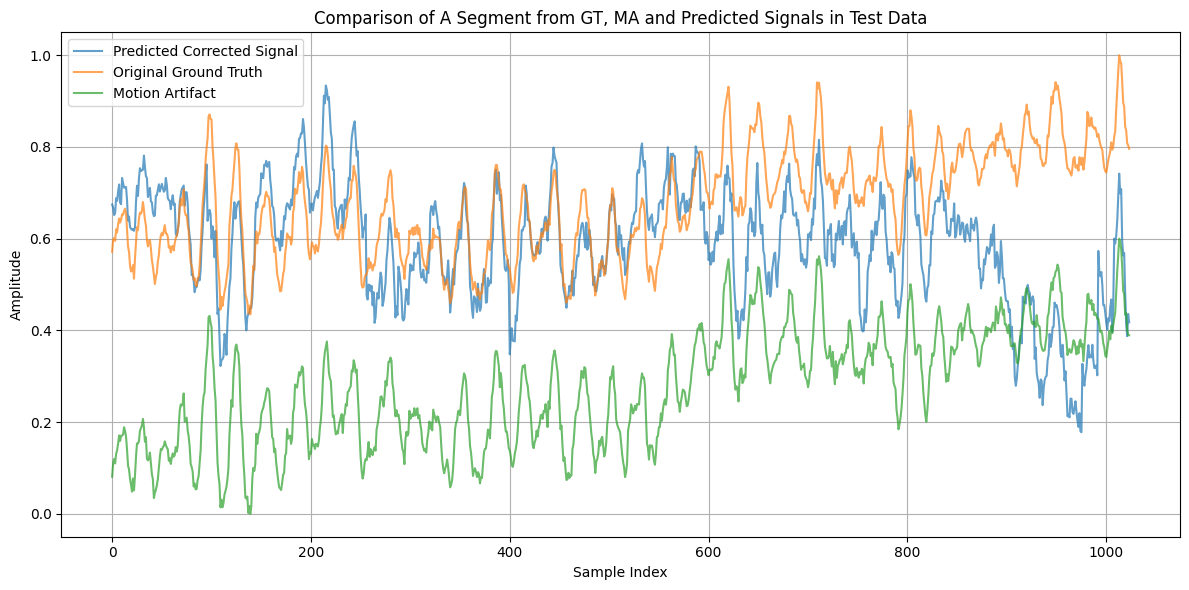

In [28]:
plt.figure(figsize=(12, 6))
plt.plot((np.squeeze(y_pred_test, axis=-1))[10,:], label='Predicted Corrected Signal', alpha=0.7)
plt.plot((np.squeeze(all_labels_test, axis = -1))[10,:], label='Original Ground Truth', alpha=0.7)
plt.plot((np.squeeze(all_input_eeg_test[:,:,0:1], axis = -1)[10,:]), label='Motion Artifact', alpha=0.7)
plt.title('Comparison of A Segment from GT, MA and Predicted Signals in Test Data')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Plot For All Test

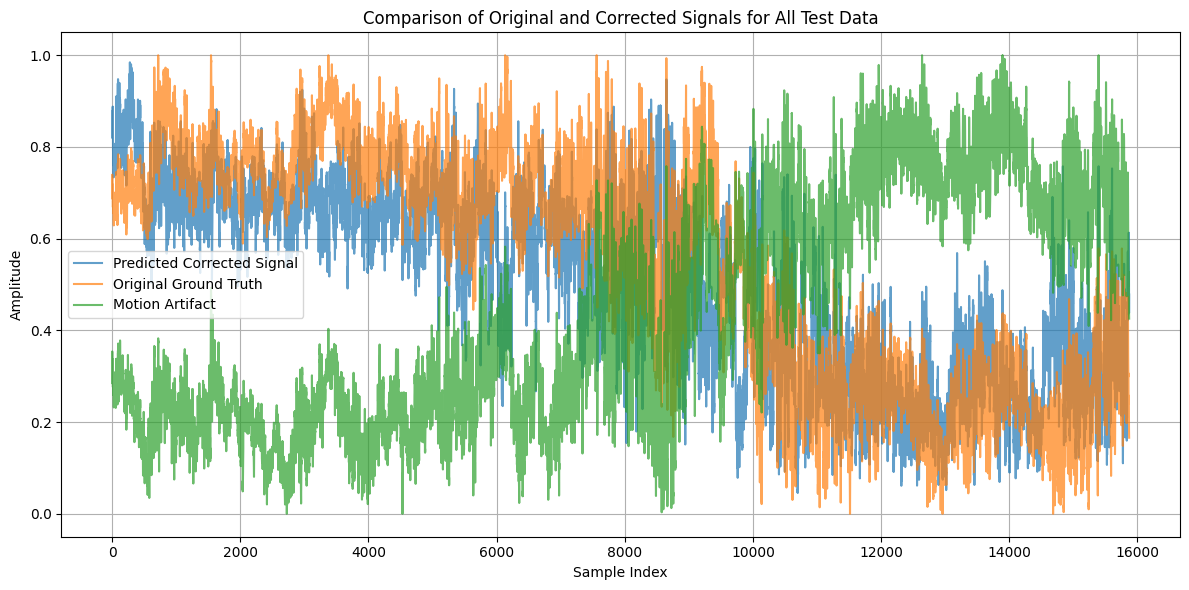

In [29]:



plt.figure(figsize=(12, 6))
plt.plot(predicted_test, label='Predicted Corrected Signal', alpha=0.7)
plt.plot(ground_truth_test, label='Original Ground Truth', alpha=0.7)
plt.plot(motion_artifact_test, label='Motion Artifact', alpha=0.7)
plt.title('Comparison of Original and Corrected Signals for All Test Data')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Plot For Train Single Segment

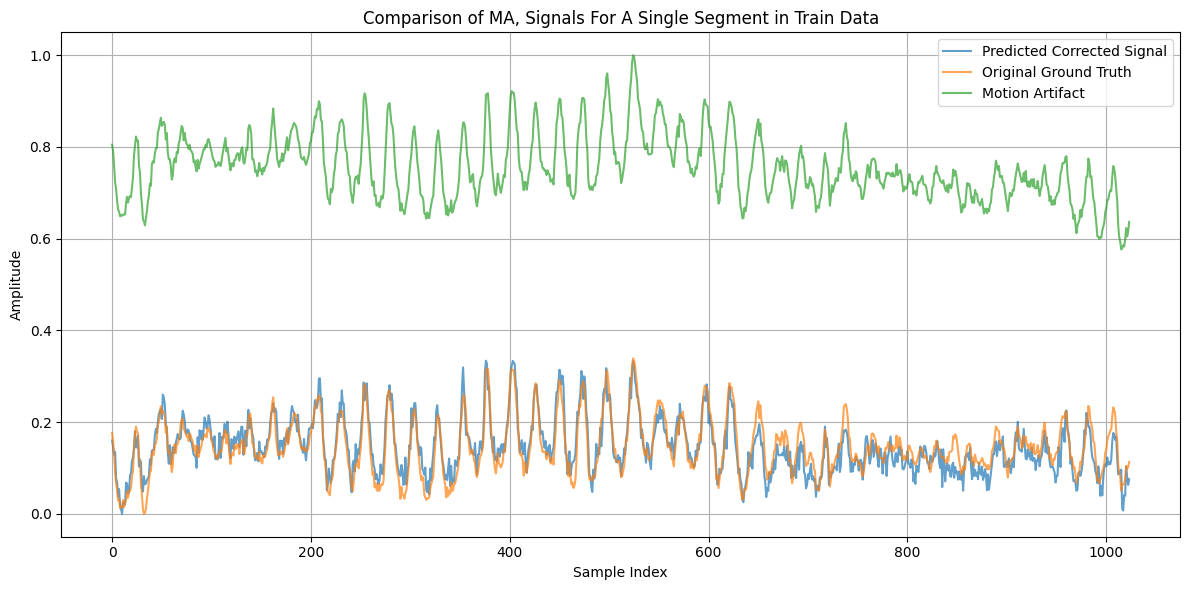

In [81]:
plt.figure(figsize=(12, 6))
plt.plot((np.squeeze(y_pred_train, axis=-1))[10,:], label='Predicted Corrected Signal', alpha=0.7)
plt.plot((np.squeeze(all_labels_train, axis = -1))[10,:], label='Original Ground Truth', alpha=0.7)
plt.plot((np.squeeze(all_input_eeg_train[:,:,0:1], axis = -1)[10,:]), label='Motion Artifact', alpha=0.7)
plt.title('Comparison of MA, Signals For A Single Segment in Train Data')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Plot For All Train

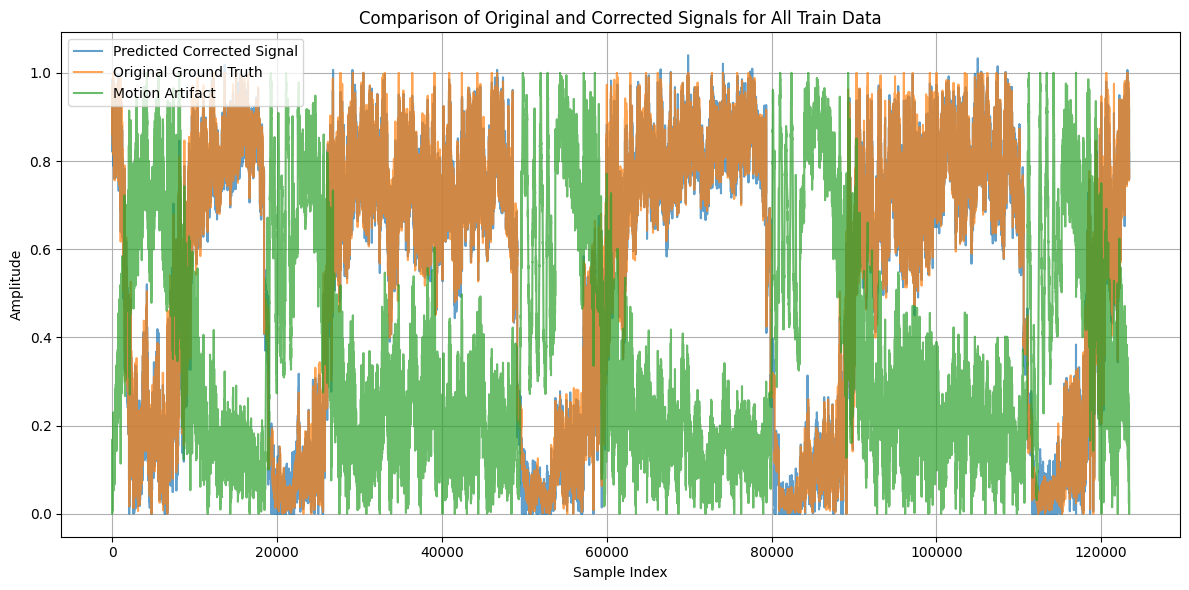

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(predicted_train, label='Predicted Corrected Signal', alpha=0.7)
plt.plot(ground_truth_train, label='Original Ground Truth', alpha=0.7)
plt.plot(motion_artifact_train, label='Motion Artifact', alpha=0.7)
plt.title('Comparison of Original and Corrected Signals for All Train Data')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Quantitative Analysis

In [33]:
'''def calculate_delta_snr(ground_truth, motion_artifact, predicted_signal):
    ground_truth_var = np.var(ground_truth, axis=0)
    motion_artifact_var = np.var(motion_artifact, axis=0)
    predicted_signal_var = np.var(predicted_signal, axis=0)

    # Replace zero variances with a small value
    predicted_signal_var = np.where(predicted_signal_var == 0, 1e-8, predicted_signal_var)
    motion_artifact_var = np.where(motion_artifact_var == 0, 1e-8, motion_artifact_var)

    # Calculate SNRs
    snr_motion = 10 * np.log10(ground_truth_var / motion_artifact_var)
    snr_predicted = 10 * np.log10(ground_truth_var / predicted_signal_var)

    # Calculate ΔSNR
    delta_snr = snr_predicted - snr_motion

    return delta_snr'''


def calculate_pcc(x, y):

  # Calculate PCC using scipy.stats.pearsonr
  correlation, _ = pearsonr(x, y)
  return correlation



In [60]:
def calculate_mse(signal1, signal2):
    return np.mean((signal1 - signal2) ** 2, axis=0)

def calculate_power(signal):
    return np.mean(signal ** 2, axis=0)

def calculate_delta_snr_mse(ground_truth, motion_artifact, predicted_signal):
    power_ground_truth = calculate_power(ground_truth)
    mse_motion = calculate_mse(ground_truth, motion_artifact)
    mse_predicted = calculate_mse(ground_truth, predicted_signal)

    snr_motion = 10 * np.log10(power_ground_truth / mse_motion)
    snr_predicted = 10 * np.log10(power_ground_truth / mse_predicted)

    delta_snr = snr_predicted - snr_motion
    return delta_snr




For Test Part

In [35]:
ground_truth_testf = ground_truth_test.flatten()
predicted_testf = predicted_test.flatten()
motion_artifact_testf = motion_artifact_test.flatten()

# Calculate PCCs
pcc_after_test = calculate_pcc(ground_truth_testf, predicted_testf)
pcc_before_test = calculate_pcc(ground_truth_testf, motion_artifact_testf)


# Print the PCC values
print(f"PCC between Ground Truth and Predicted: {pcc_after_test:.4f}")
print(f"PCC between Ground Truth and Motion Artifact: {pcc_before_test:.4f}")



#Percentage reduction in motion artifacts (η)
eta_test = 100 * (1 - (1 - pcc_after_test) / (1 - pcc_before_test))
mae_test = np.mean(np.abs(ground_truth_test - predicted_test), axis=0)  


PCC between Ground Truth and Predicted: 0.8240
PCC between Ground Truth and Motion Artifact: -0.6660


In [62]:
print(f"Mean Absolute Error (MAE) (averaged across channels) For Test:", mae_test)
print(f"Pearson Correlation Coefficient Before (PCC_Before) For Test:", pcc_before_test)
print(f"Pearson Correlation Coefficient After (PCC_After) For Test:", pcc_after_test)
print(f"Percentage Reduction in Motion Artifacts (η) For Test:", eta_test)

Mean Absolute Error (MAE) (averaged across channels) For Test: [0.11605003]
Pearson Correlation Coefficient Before (PCC_Before) For Test: -0.6660470323091965
Pearson Correlation Coefficient After (PCC_After) For Test: 0.8239547069226967
Percentage Reduction in Motion Artifacts (η) For Test: 89.43335394119704


For Train Part

In [37]:
ground_truth_trainf = ground_truth_train.flatten()
predicted_trainf = predicted_train.flatten()
motion_artifact_trainf = motion_artifact_train.flatten()

# Calculate PCCs
pcc_after_train = calculate_pcc(ground_truth_trainf, predicted_trainf)
pcc_before_train = calculate_pcc(ground_truth_trainf, motion_artifact_trainf)


# Print the PCC values
print(f"PCC between Ground Truth and Predicted: {pcc_after_train:.4f}")
print(f"PCC between Ground Truth and Motion Artifact: {pcc_before_train:.4f}")



#Percentage reduction in motion artifacts (η)
eta_train = 100 * (1 - (1 - pcc_after_train) / (1 - pcc_before_train))

delta_snr_train = calculate_delta_snr(ground_truth_train, motion_artifact_train, predicted_train)
mae_train = np.mean(np.abs(ground_truth_train - predicted_train), axis=0)  


PCC between Ground Truth and Predicted: 0.9968
PCC between Ground Truth and Motion Artifact: -0.7320


In [61]:
print(f"Mean Absolute Error (MAE) (averaged across channels) For Train:", mae_train)
print(f"Pearson Correlation Coefficient Before (PCC_Before) For Train:", pcc_before_train)
print(f"Pearson Correlation Coefficient After (PCC_After) For train:", pcc_after_train)
print(f"Percentage Reduction in Motion Artifacts (η) For Train: ", eta_train)

Mean Absolute Error (MAE) (averaged across channels) For Train: [0.01914341]
Pearson Correlation Coefficient Before (PCC_Before) For Train: -0.7319842541631496
Pearson Correlation Coefficient After (PCC_After) For train: 0.9967572188521882
Percentage Reduction in Motion Artifacts (η) For Train:  99.81277074892469


In [42]:
gt_whole_signal_segments = np.concatenate((all_labels_train, all_labels_test), axis = 0)
ma_whole_signal_segments = np.concatenate((all_input_eeg_train[:,:,0:1], all_input_eeg_test[:,:,0:1]), axis = 0)
y_pred_whole_segments = np.concatenate((y_pred_train, y_pred_test), axis = 0)


In [44]:
def denormalize_segments_eeg_segmented(channel1_normalized, channel2_normalized, min_values, max_values):
    num_segments, segment_size, _ = channel1_normalized.shape
    
    channel1_denormalized = np.empty_like(channel1_normalized)
    channel2_denormalized = np.empty_like(channel2_normalized)
    
    for i in range(num_segments):
        normalized_segment1 = channel1_normalized[i, :, 0]
        normalized_segment2 = channel2_normalized[i, :, 0]
        
        min_value = min_values[i]
        max_value = max_values[i]
        
        denormalized_segment1 = normalized_segment1 * (max_value - min_value) + min_value
        denormalized_segment2 = normalized_segment2 * (max_value - min_value) + min_value
        
        channel1_denormalized[i, :, 0] = denormalized_segment1
        channel2_denormalized[i, :, 0] = denormalized_segment2
    
    return channel1_denormalized, channel2_denormalized




In [45]:
ground_truth_denormalized, motion_artifact_denormalized = denormalize_segments_eeg_segmented(gt_whole_signal_segments, ma_whole_signal_segments, min_values, max_values)

In [46]:
predicted_denormalized, _ = denormalize_segments_eeg_segmented(y_pred_whole_segments, ma_whole_signal_segments, min_values, max_values)

In [47]:
gt_whole_signal = reverse_segmentation(ground_truth_denormalized, 0.5)
ma_whole_signal = reverse_segmentation(motion_artifact_denormalized, 0.5)
predicted_whole = reverse_segmentation(predicted_denormalized, 0.5)



Delta SNR Measurement

In [53]:
denorm_gt_train = ground_truth_denormalized[:220,:,:]
denorm_gt_test = ground_truth_denormalized[220:,:,:]
denorm_ma_train = motion_artifact_denormalized[:220,:,:]
denorm_ma_test = motion_artifact_denormalized[220:,:,:]
denorm_predicted_train = predicted_denormalized[:220,:,:]
denorm_predicted_test = predicted_denormalized[220:,:,:]

In [56]:
denorm_gt_train = reverse_segmentation(denorm_gt_train, 0.5)
denorm_gt_test = reverse_segmentation(denorm_gt_test, 0.5)
denorm_ma_train = reverse_segmentation(denorm_ma_train, 0.5)
denorm_ma_test = reverse_segmentation(denorm_ma_test, 0.5)
denorm_predicted_train = reverse_segmentation(denorm_predicted_train, 0.5)
denorm_predicted_test = reverse_segmentation(denorm_predicted_test, 0.5)

In [58]:
mse_snr_train = calculate_delta_snr_mse(denorm_gt_train, denorm_ma_train, denorm_predicted_train)
mse_snr_test = calculate_delta_snr_mse(denorm_gt_test, denorm_ma_test, denorm_predicted_test)
print('Delta SNR For Training Data in MSE SNR Method is:', mse_snr_train)
print('Delta SNR For Test Data in MSE SNR Method is:', mse_snr_test)



Delta SNR For Training Data in MSE SNR Method is: [23.75873706]
Delta SNR For Test Data in MSE SNR Method is: [18.60742461]


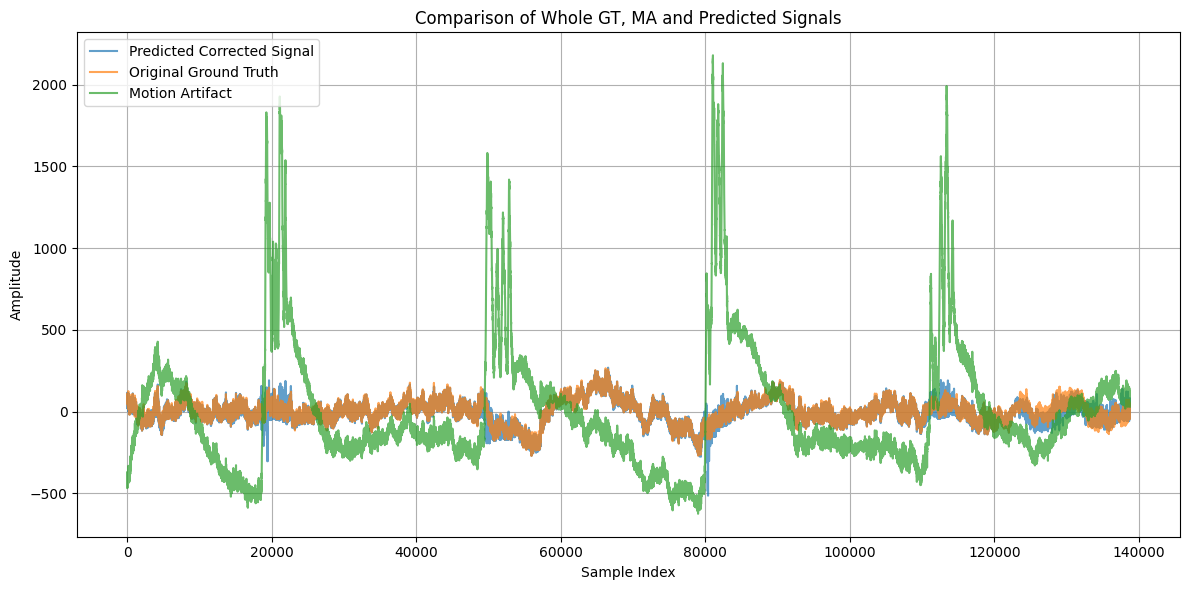

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(predicted_whole, label='Predicted Corrected Signal', alpha=0.7)
plt.plot(gt_whole_signal, label='Original Ground Truth', alpha=0.7)
plt.plot(ma_whole_signal, label='Motion Artifact', alpha=0.7)
plt.title('Comparison of Whole GT, MA and Predicted Signals')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()